In [2]:
import numpy as np
import os
import math
import copy
import cv2
import random
random.seed(1)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [4]:
print cv2.__version__

3.1.0


In [29]:
path ='/Users/shixiangyang/Downloads/wuziqi.png'
img1 = cv2.imread(path)

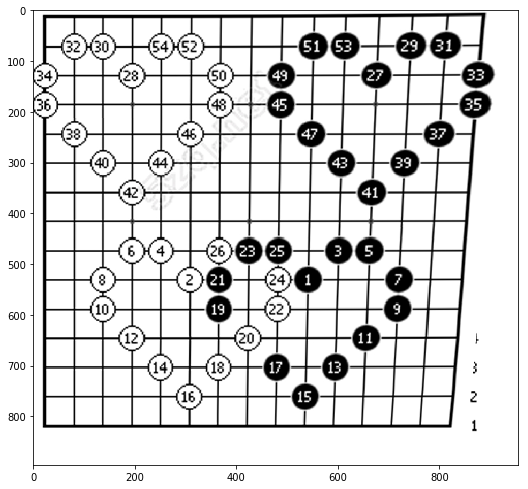

In [30]:
# %%time
fig = plt.figure()
fig.set_size_inches(40,20)
i1 = fig.add_subplot(141)
i1.imshow(img1)

In [245]:

class wuziqi_ana:
    def __init__(self,inputimg = None):
        self.img = cv2.imread(inputimg)
        self.grap = None
        self.edge = None
        self.lines =[]
        self.height,self.width = self.img.shape[:2]
        self.xmin,self.ymin = 0,0
        self.xmax,self.ymax = self.width,self.height
        self.up,self.bot,self.left,self.right=None,None,None,None
        
    def preprocess(self):
        '''
        预处理 二值化图像 降噪 模糊 强化边缘
        '''
        img1= copy.deepcopy(self.img)
        gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        # 灰度图
        self.gray=cv2.GaussianBlur(gray, (5, 5), 0) 
        # 高斯模糊
        self.edge=cv2.Canny(self.gray,60,220)
        # 查找边缘
        ret, binary = cv2.threshold(self.edge,200,255,cv2.THRESH_BINARY) 
        # 二值化
        fig = plt.figure()
        fig.set_size_inches(40,20)

        i1 = fig.add_subplot(141)
        i1.imshow(self.gray, "gray")
        i2 = fig.add_subplot(142)
        i2.imshow(self.edge)
    
    
    def straightLineDetection(self):
        '''
        直线检测 发现其中的行和列
        '''
        img0 = copy.deepcopy(self.img)

        # Convert the img to grayscale
        gray = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)

        # Apply edge detection method on the image
        edges = cv2.Canny(gray,20,220,apertureSize = 3)

        # This returns an array of r and theta values
        lines = cv2.HoughLines(edges,1,np.pi/180, 200)
        
        if len(lines)!=0:#(lines)!=None:

            for r,theta in lines[:,0,:]:

                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*r
                y0 = b*r
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(img0,(x1,y1), (x2,y2), (0,0,255),2)

            self.lines = copy.deepcopy(lines[:,0,:])
            plt.imshow(img0);
    
    def boundary_detect(self):
        '''
        检测棋盘的外框
        '''
        l = self.lines
        length = len(l)
        print length
        endurance = 0.3
        horizon = [ (r,theta) for r,theta in l if theta<endurance or theta>3.14*2-endurance ]#*np.cos(theta)
        erect = [ (r,theta) for r,theta in l if -endurance<theta-3.14/2<endurance ]
        img0 = copy.deepcopy(self.img)
        img1 = copy.deepcopy(self.img)
        up = max(horizon,key=lambda x:x[0])
        bot = min(horizon,key=lambda x:x[0])
        left = min(erect,key=lambda x:x[0])
        right = max(erect,key=lambda x:x[0])
        print 'hhhh'
        print len(up),type(up),type(up[0]),len(horizon),type(horizon),type(horizon[0])
        print up,bot,left,right
        self.up,self.bot,self.left,self.right = up,bot,left,right
        res = []
        for line in [up,bot,left,right]:
            r,theta = line
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*r
            y0 = b*r
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img0,(x1,y1), (x2,y2), (0,255,255),3)
            res.append((x1,x2,y1,y2))
        plt.imshow(img0);

        
    def trans_form(self):
        '''
        按照检测到图像的斜率 还原成正方形
        '''
        img0 = copy.deepcopy(self.img)
        maxHeight,maxWidth = self.height,self.width
        up,bot,left,right = self.up,self.bot,self.left,self.right
        def intersection(l1,l2):
            r1,theta1 = l1
            r2,theta2 = l2
            term1 = np.sin(theta1)/np.cos(theta1)-np.sin(theta2)/np.cos(theta2)
            term2 = r2/np.cos(theta2)-r1/np.cos(theta1)
            x = term2/term1
            y = np.sin(theta1)/np.cos(theta1)*x+r1/np.cos(theta1)
            return y,-x
        rec= []
        rec.append(intersection(bot,left))        
        rec.append(intersection(bot,right))
        rec.append(intersection(up,right))
        rec.append(intersection(up,left)) 
        rec = np.array(rec,dtype=np.float32).reshape((4,2))
        dst = np.array([0,0,0,maxWidth,maxHeight,maxWidth,maxHeight,0],dtype=np.float32).reshape((4,2))
        print rec
        print dst
        M = cv2.getPerspectiveTransform(rec,dst)
        warp = cv2.warpPerspective(img0, M, (maxWidth, maxHeight))
        plt.imshow(warp[:,:-64]);
    

$$y_0=k_1*x_0+b_1$$
$$y_0=k_2*x_0+b_2$$

$$(y,x)=\frac{1}{k_1-k_2}*
(\begin{array}{cccc} 
    -k_2 &   k_1    \\ 
    -1 &    1   
\end{array})*(b_1,b_2)$$


In [246]:
wuziqi = wuziqi_ana(path)

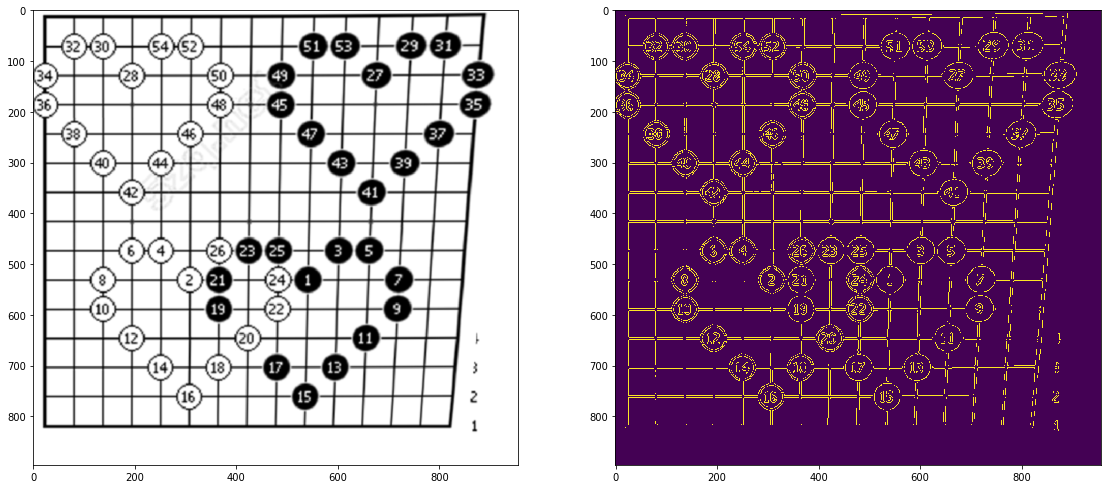

In [247]:
wuziqi.preprocess()

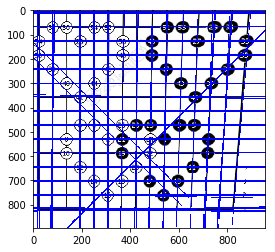

In [248]:
wuziqi.straightLineDetection()

86
hhhh
2 <type 'tuple'> <type 'numpy.float32'> 36 <type 'list'> <type 'tuple'>
(891.0, 0.08726646) (19.0, 0.0) (7.0, 1.5707964) (827.0, 1.5533431)


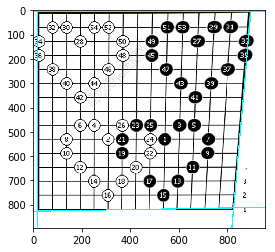

In [249]:
wuziqi.boundary_detect()

[[  19.            7.00000048]
 [  19.          826.79431152]
 [ 823.29656982  812.75531006]
 [ 893.79101562    7.00003862]]
[[   0.    0.]
 [   0.  956.]
 [ 896.  956.]
 [ 896.    0.]]


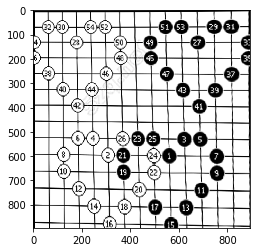

In [250]:
wuziqi.trans_form()

In [68]:
a=range(10)
max(a,key=lambda x:x)

9

In [69]:
a=zip(range(10),range(10))
max(a,key=lambda x:x[0])

(9, 9)